## Data Reduction Task- Online News Popularity Dataset

In [1]:
from datasets import popularity_dataset
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
pop=pd.read_pickle('pop_dataframe.pkl')

## Feature selection

### Information Gain

In [3]:
from datasets import get_kbest_sorted
from sklearn.feature_selection import mutual_info_regression

pop = pop.dropna()
x = pop.drop(' shares', axis=1).drop('will be popular', axis=1)
y = pop['will be popular']

#filtering using Mutual Information = Information Gain
kbest_mutual_info_regression = get_kbest_sorted(mutual_info_regression, x, y, 2)

display(kbest_mutual_info_regression)

,score
LDA_02,0.067874
self_reference_min_shares,0.052409
LDA_04,0.051609
self_reference_avg_sharess,0.050149
LDA_01,0.047678
LDA_03,0.047193
LDA_00,0.043991
self_reference_max_shares,0.038048
is_category_world,0.029391
is_weekend,0.022527


#### VIF

If we train a model with collinear features, this reduces explanability of the model. So we need to find features with high collinearity.

The Variance Inflation Factor VIF, measures how much the variance of an estimated regression coefficient is increased because of the collinearity

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
x = pop.dropna().drop('will be popular', axis=1).drop(' shares', axis=1)
vif_factors = pd.Series([variance_inflation_factor(x.values, i) for i in range(x.shape[1])], index=x.columns)

display(vif_factors)

/home/dl4/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


 number_words_title                   1.076168
number_words_content                  2.227527
number_links                          1.683749
 number_links_to_mashable             1.399613
 number_imgs                          1.430315
 number_videos                        1.222772
 average_word_length                 11.177084
 number_keywords                      1.120356
is_category_lifestyle                 2.264001
is_category_entertainment             2.455876
is_category_business                  5.581403
is_category_socialmedia               2.182223
is_category_tech                      5.973373
is_category_world                     6.625134
 self_reference_min_shares            6.599351
 self_reference_max_shares            8.377868
 self_reference_avg_sharess          19.108942
is_monday                          6735.291447
is_tuesday                         7472.840981
is_wednesday                       7523.420001
is_thursday                        7353.474271
is_friday    

--> collinear features:
    
is_monday                          6735.291447

is_tuesday                         7472.840981

is_wednesday                       7523.420001

is_thursday                        7353.474271

is_friday                          5767.868212

is_saturday                                inf

is_sunday                                 inf

is_weekend                                inf

remove is_weekend and is_sunday because you have the information for the weekday and if it's weekend

--> other collinear features:

LDA_00                            2775.890199

LDA_01                            1935.016256

LDA_02                            3193.599055

LDA_03                            3493.857033

LDA_04                            3356.367947
 
from a domain perspective this makes sense because all together the value is 1 so one missing value can be calculated from the others, remove LDA_00 because of the lowest Information Gain

In [5]:
#remove the identified features and print VIF again

In [6]:
x = pop.dropna().drop('will be popular', axis=1).drop(' shares', axis=1).drop('is_monday', axis=1).drop('is_tuesday', axis=1).drop('is_wednesday', axis=1).drop('is_thursday', axis=1).drop('is_friday', axis=1).drop('is_saturday', axis=1).drop(' is_sunday', axis=1).drop(' is_weekend', axis=1).drop(' LDA_00', axis=1).drop(' LDA_01', axis=1).drop(' LDA_02', axis=1).drop(' LDA_03', axis=1).drop(' LDA_04', axis=1)
vif_factors = pd.Series([variance_inflation_factor(x.values, i) for i in range(x.shape[1])], index=x.columns)

display(vif_factors)

 number_words_title                 17.761140
number_words_content                 5.137284
number_links                         3.211876
 number_links_to_mashable            2.408862
 number_imgs                         1.808885
 number_videos                       1.281791
 average_word_length               328.172902
 number_keywords                    13.826731
is_category_lifestyle                1.462704
is_category_entertainment            2.413800
is_category_business                 2.544602
is_category_socialmedia              1.518464
is_category_tech                     2.797195
is_category_world                    3.251042
 self_reference_min_shares           6.865207
 self_reference_max_shares           8.904971
 self_reference_avg_sharess         20.433672
sentiment_subjectivity              45.103590
sentiment_polarity                  19.637433
 global_rate_positive_words         28.251379
 global_rate_negative_words         21.997422
 rate_positive_words              

--> collinear features:

average_word_length and rate_positive_words --> remove average_word_length because the feature has a lower Information Gain
    
rate_negative_words and avg_polarity_in_positive_words --> remove avg_polarity_in_positive_words because the feature has a lower Information Gain

In [7]:
x = x.drop(' average_word_length', axis=1).drop(' rate_positive_words', axis=1).drop(' rate_negative_words', axis=1).drop(' avg_polarity_in_positive_words', axis=1)
vif_factors = pd.Series([variance_inflation_factor(x.values, i) for i in range(x.shape[1])], index=x.columns)

display(vif_factors)

 number_words_title                16.305807
number_words_content                5.046022
number_links                        3.003994
 number_links_to_mashable           2.390161
 number_imgs                        1.794701
 number_videos                      1.273098
 number_keywords                   13.614896
is_category_lifestyle               1.409531
is_category_entertainment           2.244762
is_category_business                2.195050
is_category_socialmedia             1.423479
is_category_tech                    2.504933
is_category_world                   2.661597
 self_reference_min_shares          6.864676
 self_reference_max_shares          8.901654
 self_reference_avg_sharess        20.425741
sentiment_subjectivity             34.036670
sentiment_polarity                 12.014857
 global_rate_positive_words        15.882048
 global_rate_negative_words         8.835277
 min_polarity_in_positive_words     3.697689
 max_polarity_in_positive_words    23.848137
 avg_polar

--> collinear features:

sentiment_subjectivity and avg_polarity_in_negative_words --> remove avg_polarity_in_negative_words because the feature has a lower Information Gain

In [8]:
x = x.drop(' avg_polarity_in_negative_words', axis=1).drop('sentiment_subjectivity', axis=1)
vif_factors = pd.Series([variance_inflation_factor(x.values, i) for i in range(x.shape[1])], index=x.columns)

display(vif_factors)

 number_words_title                15.991295
number_words_content                4.846380
number_links                        2.961567
 number_links_to_mashable           2.389711
 number_imgs                        1.791595
 number_videos                      1.268816
 number_keywords                   13.513508
is_category_lifestyle               1.406886
is_category_entertainment           2.242163
is_category_business                2.183844
is_category_socialmedia             1.416857
is_category_tech                    2.474040
is_category_world                   2.641925
 self_reference_min_shares          6.864075
 self_reference_max_shares          8.898938
 self_reference_avg_sharess        20.411416
sentiment_polarity                 10.436866
 global_rate_positive_words        15.227696
 global_rate_negative_words         8.168536
 min_polarity_in_positive_words     3.413365
 max_polarity_in_positive_words    22.805563
 min_polarity_in_negative_words     8.720138
 max_polar

--> collinear features:

max_polarity_in_positive_words and self_reference_avg_sharess --> remove max_polarity_in_positive_words because the feature has a lower Information Gain

sentiment_polarity and global_rate_positive_words --> remove global_rate_positive_words because the feature has a lower Information Gain

In [9]:
x = x.drop(' max_polarity_in_positive_words', axis=1).drop(' self_reference_avg_sharess', axis=1).drop('sentiment_polarity', axis=1).drop(' global_rate_positive_words', axis=1)
vif_factors = pd.Series([variance_inflation_factor(x.values, i) for i in range(x.shape[1])], index=x.columns)

display(vif_factors)

 number_words_title                15.463457
number_words_content                4.558317
number_links                        2.899499
 number_links_to_mashable           2.325127
 number_imgs                        1.770310
 number_videos                      1.263475
 number_keywords                   12.808745
is_category_lifestyle               1.387532
is_category_entertainment           2.208767
is_category_business                2.098846
is_category_socialmedia             1.378692
is_category_tech                    2.413599
is_category_world                   2.610785
 self_reference_min_shares          1.376536
 self_reference_max_shares          1.435095
 global_rate_negative_words         4.732750
 min_polarity_in_positive_words     3.027290
 min_polarity_in_negative_words     7.666503
 max_polarity_in_negative_words     2.600787
 title_sentiment_subjectivity       3.976206
 title_sentiment_polarity           1.371287
 abs_title_subjectivity             4.946968
 abs_title

--> collinear features:

number_words_title and number_keywords --> remove number_words_title because the feature has a lower Information Gain

In [10]:
x = x.drop(' number_words_title', axis=1).drop(' number_keywords', axis=1)
vif_factors = pd.Series([variance_inflation_factor(x.values, i) for i in range(x.shape[1])], index=x.columns)

display(vif_factors)

number_words_content               4.554924
number_links                       2.848948
 number_links_to_mashable          2.314697
 number_imgs                       1.753120
 number_videos                     1.256013
is_category_lifestyle              1.281125
is_category_entertainment          1.885328
is_category_business               1.792002
is_category_socialmedia            1.314129
is_category_tech                   2.006670
is_category_world                  2.136897
 self_reference_min_shares         1.375444
 self_reference_max_shares         1.435022
 global_rate_negative_words        4.598704
 min_polarity_in_positive_words    2.862242
 min_polarity_in_negative_words    7.609109
 max_polarity_in_negative_words    2.519772
 title_sentiment_subjectivity      3.735827
 title_sentiment_polarity          1.359541
 abs_title_subjectivity            4.159833
 abs_title_sentiment_polarity      3.489193
dtype: float64

--> we removed all features with VIF under 10.0

recommendation to remove for every pair of collinear features one of the features. So remove:

--> remove is_weekend 

--> remove is_sunday

--> remove LDA_00

--> remove average_word_length

--> remove avg_polarity_in_positive_words

--> remove avg_polarity_in_negative_words

--> remove global_rate_positive_words

--> remove max_polarity_in_positive_words

--> remove number_words_title

#### Remove the features and show VIF again

In [11]:
x = pop.dropna().drop('will be popular', axis=1).drop(' shares', axis=1).drop(' is_weekend', axis=1).drop(' is_sunday', axis=1).drop(' LDA_00', axis=1).drop(' average_word_length', axis=1).drop(' avg_polarity_in_positive_words', axis=1).drop(' avg_polarity_in_negative_words', axis=1).drop(' global_rate_positive_words', axis=1).drop(' max_polarity_in_positive_words', axis=1).drop(' number_words_title', axis=1)
vif_factors = pd.Series([variance_inflation_factor(x.values, i) for i in range(x.shape[1])], index=x.columns)

display(vif_factors)

number_words_content                4.755971
number_links                        3.023429
 number_links_to_mashable           2.408004
 number_imgs                        1.827010
 number_videos                      1.325426
 number_keywords                   14.658300
is_category_lifestyle               2.172222
is_category_entertainment           2.867279
is_category_business                4.304025
is_category_socialmedia             1.880089
is_category_tech                    6.614710
is_category_world                   7.733317
 self_reference_min_shares          6.867736
 self_reference_max_shares          8.905938
 self_reference_avg_sharess        20.435518
is_monday                           3.164162
is_tuesday                          3.402336
is_wednesday                        3.410531
is_thursday                         3.353495
is_friday                           2.852845
is_saturday                         1.789494
 LDA_01                             4.022387
 LDA_02   

In [12]:
### remove again the high collinear feature

--> sentiment_subjectivity and rate_positive_words: remove rate_positive_words because of the lower Information Gain

--> rate_negative_words and self_reference_avg_sharess: remove rate_negative_words because of the lower Information Gain

--> global_rate_negative_words and number_keywords: remove global_rate_negative_words because of the lower Information Gain


In [13]:
x = x.drop(' rate_positive_words', axis=1).drop(' rate_negative_words', axis=1).drop(' global_rate_negative_words', axis=1)
vif_factors = pd.Series([variance_inflation_factor(x.values, i) for i in range(x.shape[1])], index=x.columns)

display(vif_factors)

number_words_content                4.712679
number_links                        2.959988
 number_links_to_mashable           2.392995
 number_imgs                        1.820036
 number_videos                      1.298988
 number_keywords                   14.460359
is_category_lifestyle               2.092204
is_category_entertainment           2.717233
is_category_business                3.474042
is_category_socialmedia             1.725098
is_category_tech                    6.278100
is_category_world                   7.289155
 self_reference_min_shares          6.866835
 self_reference_max_shares          8.901476
 self_reference_avg_sharess        20.425725
is_monday                           3.110201
is_tuesday                          3.341118
is_wednesday                        3.350110
is_thursday                         3.294757
is_friday                           2.810319
is_saturday                         1.776024
 LDA_01                             3.815385
 LDA_02   

--> self_reference_avg_sharess and sentiment_subjectivity: remove sentiment_subjectivity because of the lower Information Gain

In [14]:
x = x.drop('sentiment_subjectivity', axis=1)
vif_factors = pd.Series([variance_inflation_factor(x.values, i) for i in range(x.shape[1])], index=x.columns)

display(vif_factors)

number_words_content                4.707525
number_links                        2.939455
 number_links_to_mashable           2.392384
 number_imgs                        1.819712
 number_videos                      1.298189
 number_keywords                   14.353132
is_category_lifestyle               2.075681
is_category_entertainment           2.714651
is_category_business                3.324621
is_category_socialmedia             1.688033
is_category_tech                    6.207549
is_category_world                   7.262452
 self_reference_min_shares          6.865804
 self_reference_max_shares          8.896337
 self_reference_avg_sharess        20.405501
is_monday                           3.087192
is_tuesday                          3.314894
is_wednesday                        3.322685
is_thursday                         3.268660
is_friday                           2.785617
is_saturday                         1.768215
 LDA_01                             3.674400
 LDA_02   

--> number_keywords and self_reference_avg_sharess: remove number_keywords because of the lower Information Gain

In [15]:
x = x.drop(' number_keywords', axis=1)
vif_factors = pd.Series([variance_inflation_factor(x.values, i) for i in range(x.shape[1])], index=x.columns)

display(vif_factors)

number_words_content                4.703542
number_links                        2.920830
 number_links_to_mashable           2.385317
 number_imgs                        1.819620
 number_videos                      1.296874
is_category_lifestyle               1.991113
is_category_entertainment           2.711012
is_category_business                3.020975
is_category_socialmedia             1.651482
is_category_tech                    6.037533
is_category_world                   7.043010
 self_reference_min_shares          6.863983
 self_reference_max_shares          8.894488
 self_reference_avg_sharess        20.398666
is_monday                           3.057904
is_tuesday                          3.279564
is_wednesday                        3.287935
is_thursday                         3.233274
is_friday                           2.756925
is_saturday                         1.749580
 LDA_01                             3.317434
 LDA_02                             7.201784
 LDA_03   

--> the value self_reference_avg_sharess doesn't change a lot, so the number_keywords was collinaer with other features which was confirmed of the values of other features

--> remove self_reference_avg_sharess and look to other features to confirm that this feature is collinear with other features instead of number_keywords

In [16]:
x = x.drop(' self_reference_avg_sharess', axis=1)
vif_factors = pd.Series([variance_inflation_factor(x.values, i) for i in range(x.shape[1])], index=x.columns)

display(vif_factors)

number_words_content               4.703384
number_links                       2.919127
 number_links_to_mashable          2.331809
 number_imgs                       1.818858
 number_videos                     1.295494
is_category_lifestyle              1.991089
is_category_entertainment          2.710993
is_category_business               3.020923
is_category_socialmedia            1.651478
is_category_tech                   6.036960
is_category_world                  7.042442
 self_reference_min_shares         1.377268
 self_reference_max_shares         1.435666
is_monday                          3.056611
is_tuesday                         3.278831
is_wednesday                       3.286680
is_thursday                        3.232646
is_friday                          2.756521
is_saturday                        1.749542
 LDA_01                            3.316859
 LDA_02                            7.200988
 LDA_03                            4.568602
 LDA_04                         

--> all collinear features are removed

### compare information gain and correlation of the reamining features

#### calculate the infomation gain for the new dataset again

In [17]:
pop = pop.dropna()
x = pop.drop(' shares', axis=1).drop('will be popular', axis=1).drop(' is_weekend', axis=1).drop(' is_sunday', axis=1).drop(' LDA_00', axis=1).drop(' average_word_length', axis=1).drop(' avg_polarity_in_positive_words', axis=1).drop(' avg_polarity_in_negative_words', axis=1).drop(' global_rate_positive_words', axis=1).drop(' max_polarity_in_positive_words', axis=1).drop(' number_words_title', axis=1).drop(' rate_positive_words', axis=1).drop(' rate_negative_words', axis=1).drop(' global_rate_negative_words', axis=1).drop('sentiment_subjectivity', axis=1).drop(' number_keywords', axis=1).drop(' self_reference_avg_sharess', axis=1)
y = pop['will be popular']

#filtering using Mutual Information = Information Gain
kbest_mutual_info_regression = get_kbest_sorted(mutual_info_regression, x, y, 2)

display(kbest_mutual_info_regression)

,score
LDA_02,0.069336
LDA_04,0.052365
LDA_03,0.048367
LDA_01,0.046170
self_reference_min_shares,0.039996
self_reference_max_shares,0.038559
is_category_world,0.031713
number_imgs,0.020093
is_category_entertainment,0.014662
title_sentiment_polarity,0.013839


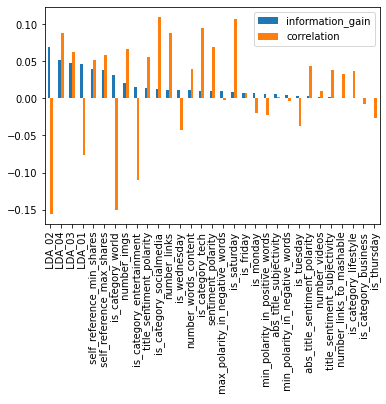

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Build new DataFrame for information gain and correlation side by side
corr = pop.corrwith(pop['will be popular'])
features = kbest_mutual_info_regression.index
values = []
for feature in features:
    # access correct values by index
    values.append([kbest_mutual_info_regression.loc[feature,'score'], corr[feature]])
df = pd.DataFrame(values, columns=['information_gain', 'correlation'], index=features)
df.plot.bar()

plt.show()

--> highest correlating features: 
    
    is_category_socialmedia, is_saturday, is_category_tech, number_links
    
    highest correlating features with the highest information gain: LDA_04
        
--> highest negatively correlating features:
    
    LDA_02, is_category_world, is_category_entertainment, LDA_01
    
    highest correlating features with the highest information gain: LDA_01

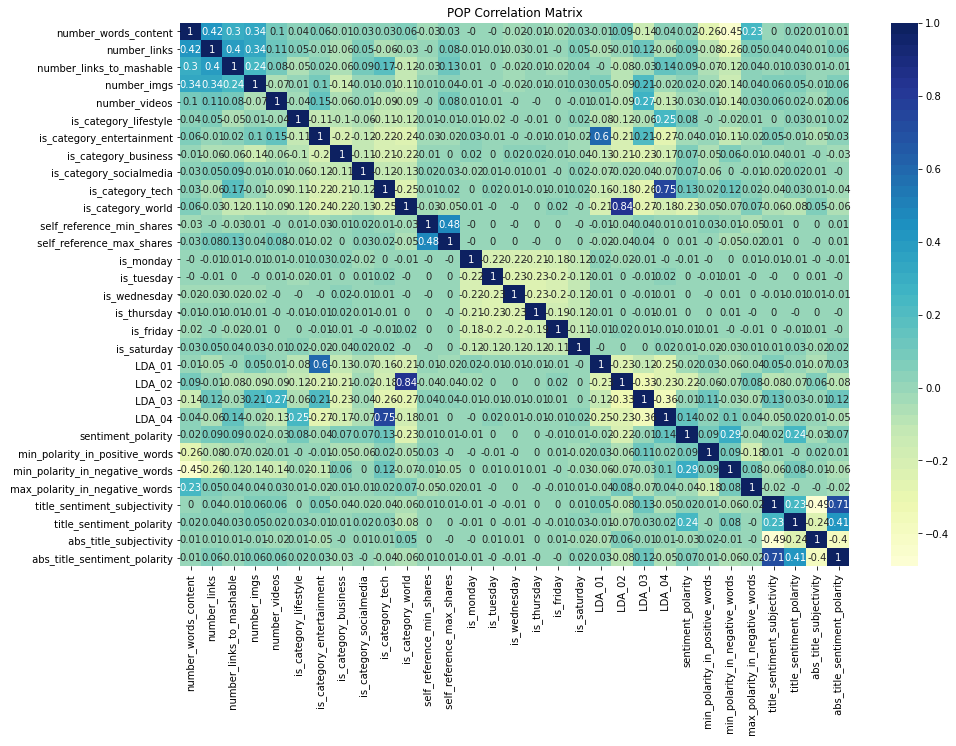

In [19]:
import seaborn as sns

correlations = round(x.corr(), 2)
plt.figure(figsize = (15, 10))
ax = sns.heatmap(correlations, annot=True, cmap = sns.color_palette("YlGnBu", 50))
ax.axes.set_title("POP Correlation Matrix")
plt.show()

--> The correlation matrix shows a high correlation between LDA_02 and is_category_world

--> We compared this statement with the VIF again

--> Remove is_category_world because the features a lower information gain

## Features reduction

In [21]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from datasets import get_logist_regression_kfold_score
from sklearn import decomposition

scaler = preprocessing.MinMaxScaler()
pop_normalized = pd.DataFrame(scaler.fit_transform(pop.drop('will be popular',axis=1).drop(' shares',axis=1)), columns=pop.columns.drop('will be popular').drop(' shares'))

#Perform PCA with 3 dimensions
num_components=3
pca = decomposition.PCA(n_components=3)
#Only use features
x=pop_normalized
pca.fit(x)
x_tran = pca.transform(x)
y_tran = pop['will be popular']

# Save PCA DataFrame for later use in evaluation
pop_pca = pd.DataFrame(x_tran, columns=['PCA1', 'PCA2', 'PCA3'], index=pop_normalized.index)
pop_pca['will be popular'] = y_tran
display(pop_pca)


,PCA1,PCA2,PCA3,will be popular
0,-0.471284,-0.767150,-0.183707,0.0
1,-0.253323,-0.019010,1.265526,0.0
2,-0.348157,0.266698,0.776648,1.0
3,0.050738,-0.493057,-0.197378,0.0
4,-0.636748,0.870932,-0.473999,0.0
...,...,...,...,...
39629,-0.312681,1.034138,-0.226472,1.0
39630,-0.200727,-0.346732,-0.129312,1.0
39631,-0.217750,-0.320735,-0.152991,0.0
39632,1.256530,0.112734,0.137858,1.0


In [23]:
pca.explained_variance_

array([0.30348107, 0.27925627, 0.24333863])

--> Low variance explained by the components

--> The variance shoud be 0.8 or more